# Running Linear Regression and DT models on daily data

In [1]:
from scipy.io import netcdf
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import math
import os,sys
import matplotlib.style

import matplotlib
import netCDF4

matplotlib.style.use('classic')
import time
import timeit
from datetime import datetime

In [2]:
import glob,os,sys
os.chdir('C:/Users/yashg/Documents/Cloud_Data_Files')
f=glob.glob('./cdfs_created/*.nc')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [4]:
def get_data(f):
    lwcc=[]
    vsc=[]
    rsc=[]
    ccnc=[]
    cdcc=[]
    hc=[]
    tc=[]
    m=Dataset(f)
    lwc=np.ma.filled(m['LWC_MB'][:])
    vs=(np.ma.filled(m['Velocity'][:]))
    rs=(np.ma.filled(m['Reflectivity'][:]))
    ccns=(np.ma.filled(m['CCN'][:]))
    cdcs=(np.ma.filled(m['CDC_pinsky'][:]))
    ts=(np.ma.filled(m['Temperature'][:]))
    cb=np.ma.filled(m['cloudbase'][:])
    cup=np.ma.filled(m['cloudup'][:])
    h=np.ma.filled(m['Height'][:])
    for tx in range(len(cb)): 
        xb=np.argmin(np.abs(h-cb[tx]))
        xu=np.argmin(np.abs(h-cup[tx]))
        hc.append(h[xb:xu])
        lwcc.append(lwc[tx][xb:xu])
        vsc.append(vs[tx][xb:xu])
        rsc.append(rs[tx][xb:xu])
        ccnc.append(ccns[tx][xb:xu])
        cdcc.append(cdcs[tx][xb:xu])  
        tc.append(ts[tx][xb:xu])  
    fl=([vsc,rsc,ccnc,cdcc,tc,lwcc])
    for i,x in enumerate(fl):
        fl[i]=[item for sublist in x for item in sublist]
    fl=np.array(fl).T
    fl=fl[(fl[:,1]!=9.96921e+36)&(fl[:,-1]!=9.96921e+36)&(fl[:,-1]!=0)]
    fl=fl[~np.isnan(fl).any(axis=1)]
    X=fl[:,:-1]
    y=fl[:,-1]
    return X,y

In [5]:
def models(f):
    start = time.time()
    X,y=get_data(f)
    acc_LR=[]
    acc_DT=[]
    for i in range(0,10):
        X_train, X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state=0)
        clf = LinearRegression()
        clf.fit(X_train,y_train)
        ypred=clf.predict(X_test)
        r_reg=clf.score(X_test,y_test)    
        acc_LR.append(r_reg)
        regressor = DecisionTreeRegressor(random_state = 0)  
        regressor.fit(X_train, y_train)
        y_pred = regressor.predict(X_test)
        r_dt=regressor.score(X_test,y_test)
        acc_DT.append(r_dt)
    plt.plot(y_test,ypred,'.')
    plt.plot([0,0.5,1],[0,0.5,1])
    plt.xlabel('Test data')
    plt.ylabel('Predicted')
    plt.title(f'{f[-11:-3]}: Linear Regression')
#    plt.savefig(f'C:/Users/yashg/Documents/Cloud_Data_Files/plots/generated_cdf_images/{x[-11:-3]}_reg.jpg')
    plt.show()
    plt.plot(y_test,y_pred,'.')
    plt.plot([0,0.5,1],[0,0.5,1])
    plt.xlabel('Test data')
    plt.ylabel('Predicted')
    plt.title(f'{f[-11:-3]}: Decision Tree')
#    plt.savefig(f'C:/Users/yashg/Documents/Cloud_Data_Files/plots/generated_cdf_images/{x[-11:-3]}_DT.jpg')
    plt.show()
    end = time.time()
    ts=end-start
    r2_LR=np.mean(acc_LR)
    r2_DT=np.mean(acc_DT)
    df={'Date':[f[-11:-3]],'No. of samples':[len(X)],'Modeling time(s)':[ts],'R^2_LR':[r2_LR],'R^2_DT':[r2_DT]}
    data=pd.DataFrame(df)
    return data

./cdfs_created\20110505.nc


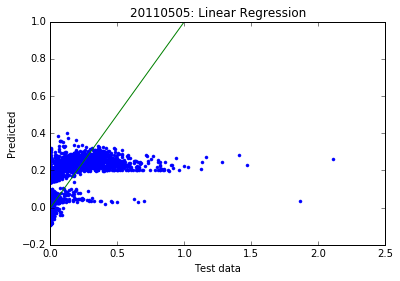

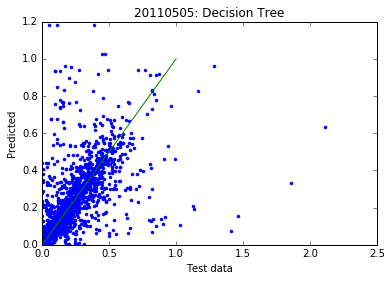

./cdfs_created\20110513.nc


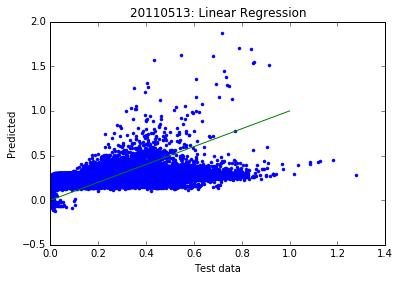

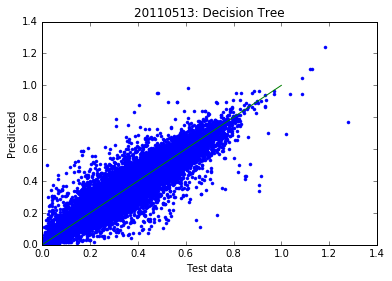

./cdfs_created\20110514.nc


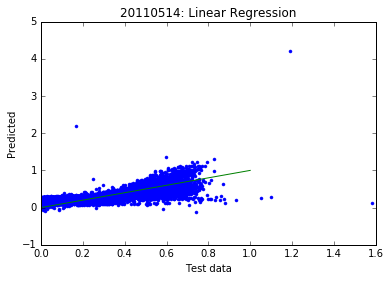

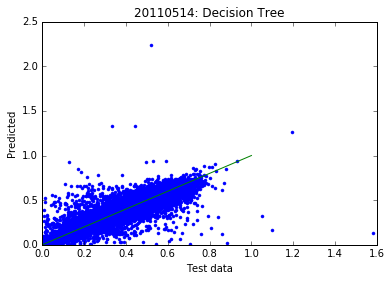

./cdfs_created\20110519.nc


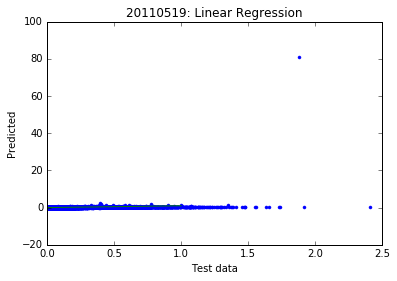

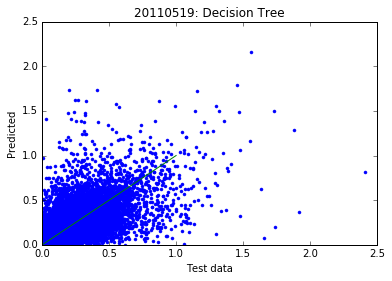

./cdfs_created\20110527.nc


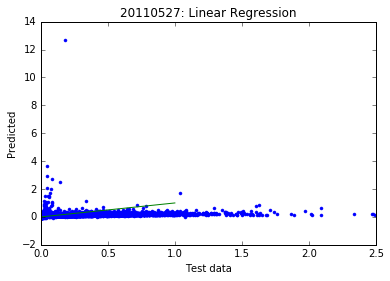

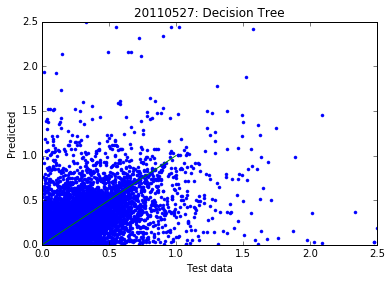

./cdfs_created\20110529.nc


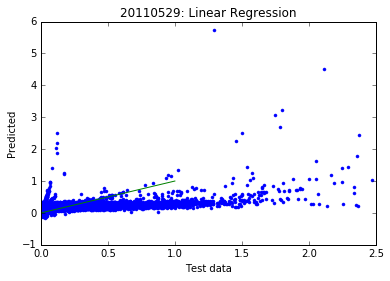

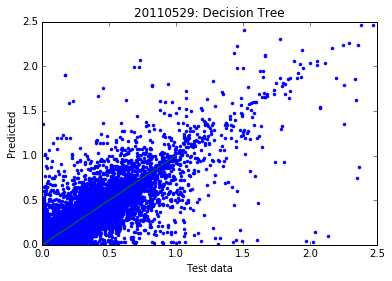

In [6]:
data=pd.DataFrame()
for x in f:
    print(x)
    dff=models(x)
    data=data.append(dff)

In [17]:
data.drop(columns=['Modeling time(s)','R^2_LR']).to_csv('C:/Users/yashg/OneDrive/Desktop/CMU/Project/Report/plots/d.csv')

In [10]:
def lr_all(f):
    X,y=get_data(f)
    clf = LinearRegression()  
    clf.fit(X,y)
    ypred=clf.predict(X)
    plt.plot(y,ypred,'.')
    plt.plot([0,1],[0,1])
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Linear Regression Results for {f[-11:-3]}')
    plt.savefig(f'C:/Users/yashg/Documents/Cloud_Data_Files/plots/generated_cdf_images/{f[-11:-3]}_tot_reg.jpg')
    plt.show()

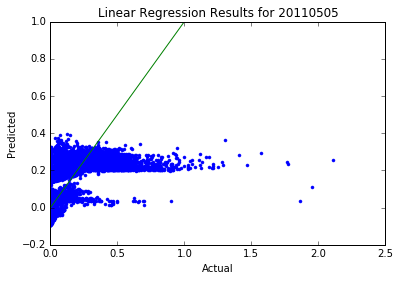

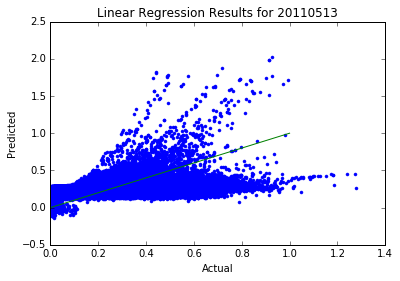

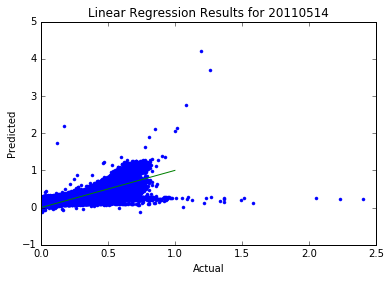

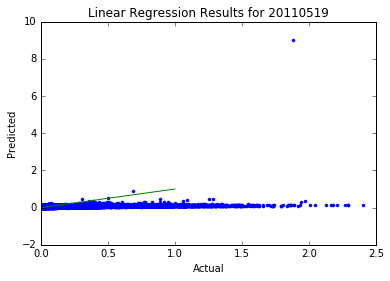

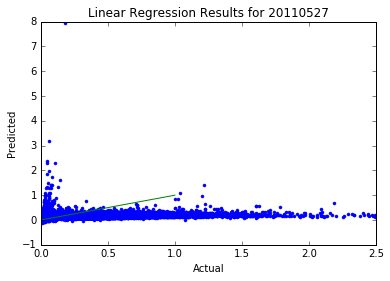

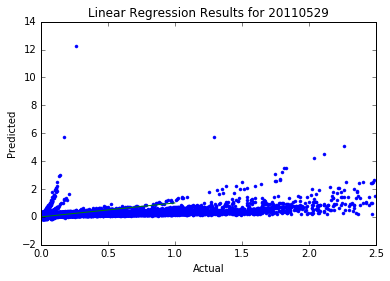

In [11]:
for x in f:
    lr_all(x)